<a href="https://colab.research.google.com/github/annyfan/550/blob/master/notebookc80a383385.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Imports
import os
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

# Metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
import sys

In [2]:
!wget "https://www.dropbox.com/s/qvo45vf0kc7j41d/ift6758-a20.zip?dl=0" -O data.zip


--2020-12-14 14:32:41--  https://www.dropbox.com/s/qvo45vf0kc7j41d/ift6758-a20.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qvo45vf0kc7j41d/ift6758-a20.zip [following]
--2020-12-14 14:32:41--  https://www.dropbox.com/s/raw/qvo45vf0kc7j41d/ift6758-a20.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0403e55e0d28cfeacec0eb3209.dl.dropboxusercontent.com/cd/0/inline/BFAzHWzRFXsIAcdgd34OQmIeBz80IZ3J3DHo_dbqxsGnH6XfI86h4lFZODOTU1EdUSfpbTx59CJffwKGoK8OMReCY9eEaz658u3d8wB_DgdRBxol7FvlQvGcDC2wG9R3EXg/file# [following]
--2020-12-14 14:32:42--  https://uc0403e55e0d28cfeacec0eb3209.dl.dropboxusercontent.com/cd/0/inline/BFAzHWzRFXsIAcdgd34OQmIeBz80IZ3J3DHo_dbqxsGnH6XfI86h4lFZODOTU1EdUSfpbTx59CJffwKGoK8OMReCY9eEaz658

In [ ]:
!unzip data.zip

In [6]:
#Visualize the count of number of survivors
sns.set()

In [7]:
# Set random seeds (for reproducibility requirement)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(67)
np.random.seed(67)
random.seed(67)

In [284]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [85]:
train_df

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,NaN,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,mumbai,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,NYC + 70 Countries Worldwide,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,"Indianapolis, In",Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,"777 Beach Blvd. Biloxi, MS",Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,KP5DR7CTN8CNLG8P,OkKZVeUwhipjmao,NaN,Not set,Verified,490707,ddeef6,000000,False,-25200.0,NaN,Disabled,en,Thu Jan 20 20:22:20 +0000 2011,Pacific Time (US & Canada),6086,76,985,56,unknown,24.792,8.1106,KP5DR7CTN8CNLG8P.png,1373
7496,SGNF9P1P3922T34T,TPgyIiQieSq,NaN,Not set,Not verified,000000,ffffff,ffffff,False,-10800.0,Belo Horizonte,Enabled,pt,Wed Mar 16 03:50:49 +0000 2011,America/Sao_Paulo,280190,38604,20652,172,unknown,26.006,0.8956,SGNF9P1P3922T34T.png,1407
7497,O00FTLDT6O803LD0,piL8bSOPoaW4,NaN,Set,Verified,0084b4,ddffcc,00133b,False,7200.0,"Stockholm, Sweden",enabled,en,Sat Mar 14 16:18:06 +0000 2009,Stockholm,21647,49,2348,271,,15.030,2.8867,O00FTLDT6O803LD0.png,1235
7498,9F04JLR9JGT8R3EJ,buidBJStq59D,NaN,Set,Not verified,91d2fa,ddffcc,fa743e,False,-10800.0,Brasil,enabled,pt,Sat Jul 25 16:08:25 +0000 2009,Brasilia,89005,256,73830,346,business,11.948,1.7756,9F04JLR9JGT8R3EJ.png,1105


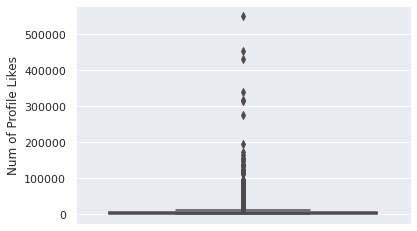

In [9]:
sns.boxplot(y = "Num of Profile Likes", data= train_df)

In [10]:
train_df.isnull().sum()

Id                                                0
User Name                                         0
Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Profile Text Color                               66
Profile Page Color                               78
Profile Theme Color                              72
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location                                       1461
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Cate

In [11]:
train_df.loc[train_df['Num of Profile Likes'].idxmax()]

Id                                                           D8E23RLRSGIEHRO6
User Name                                                      lLvSEsGhtaCNaf
Personal URL                                      https://blob/vrpslktps6.com
Profile Cover Image Status                                                Set
Profile Verification Status                                          Verified
Profile Text Color                                                     f58ea8
Profile Page Color                                                     ddeef6
Profile Theme Color                                                    ffffff
Is Profile View Size Customized?                                        False
UTC Offset                                                              10800
Location                                                       Moscow, Russia
Location Public Visibility                                            Enabled
User Language                                                   

In [80]:

# get the number of seconds to the unix epoch start.
df_unix_sec = pd.to_datetime(train_df['Profile Creation Timestamp']).astype(int)/ 10**9

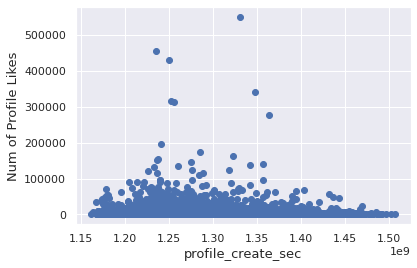

In [81]:
fig, ax = plt.subplots()
ax.scatter(x = df_unix_sec, y = train_df['Num of Profile Likes'])
plt.ylabel('Num of Profile Likes', fontsize=13)
plt.xlabel('profile_create_sec', fontsize=13)
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


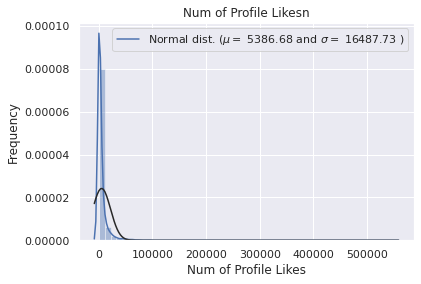

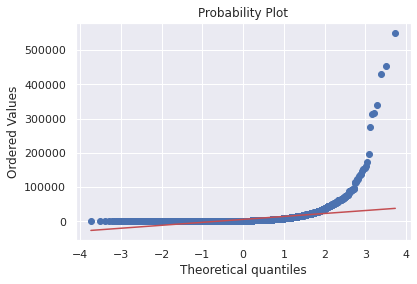

In [12]:
# Num of Profile Likes分布图
from scipy.stats import norm
from scipy import stats
sns.distplot(train_df['Num of Profile Likes'] , fit=norm)

(mu, sigma) = norm.fit(train_df['Num of Profile Likes'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Num of Profile Likesn')

# QQ-plot（verify same distribution）
fig = plt.figure()
res = stats.probplot(train_df['Num of Profile Likes'], plot=plt)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


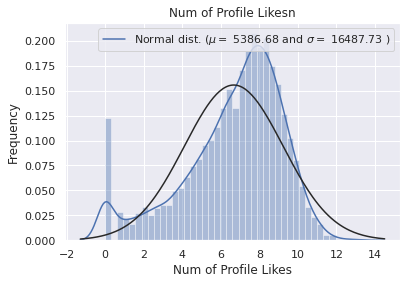

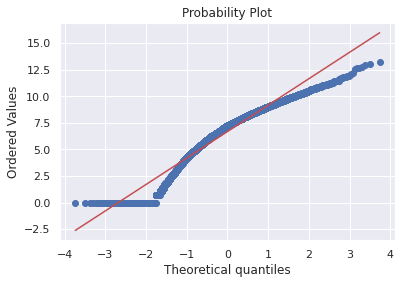

In [155]:
# Num of Profile Likes分布图
from scipy.stats import norm
from scipy import stats
sns.distplot(np.log(train_df['Num of Profile Likes'] +1), fit=norm)
# SalePrice均值、均方差
(mu, sigma) = norm.fit(train_df['Num of Profile Likes'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.title('Num of Profile Likesn')

# QQ-plot（验证某两组数据是否来自同一分布，离的距离）
fig = plt.figure()
res = stats.probplot(np.log(train_df['Num of Profile Likes']+1), plot=plt)
plt.show()

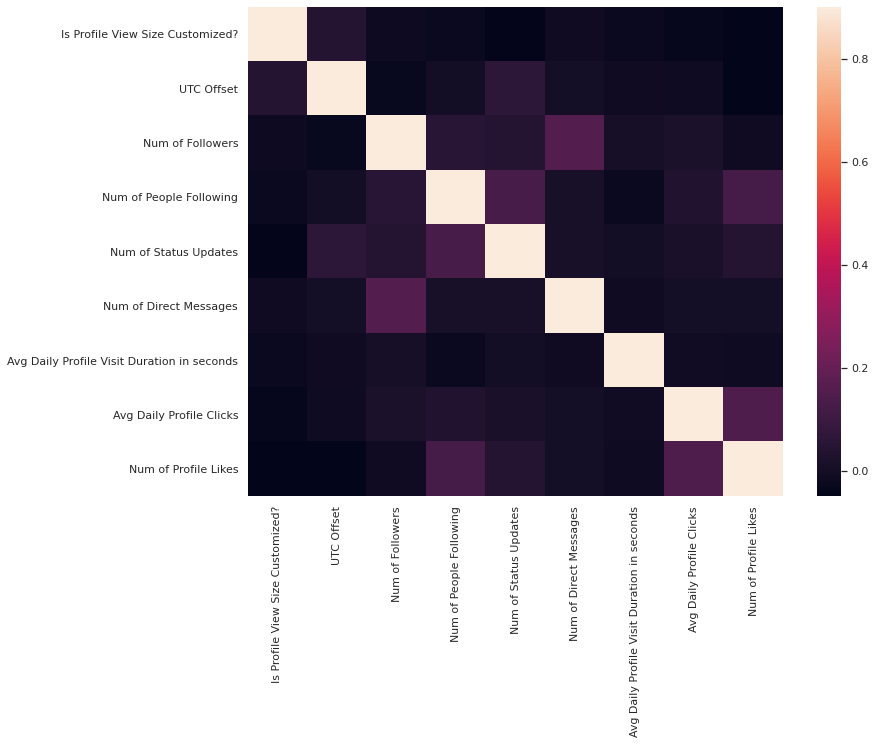

In [285]:
# 两文件数据量

ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df['Num of Profile Likes'].values
# 连接两个表，将两个表的数据共同处理
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
# 去掉目标变量SalePrice列
#all_data.drop(['Num of Profile Likes'], axis=1, inplace=True)
#查看各变量与预测目标相关性，按照右边颜色条进行判断

corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9)
plt.show()

In [286]:
# 查看各变量缺失率及降序排序
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print("missing_data:", missing_data.head(20)) # 列出前20个

# 填补缺失值，None\0\众数\中位数\指定值填充，或者去掉该列


missing_data:                                              Missing Ratio
Personal URL                                         57.06
Num of Profile Likes                                 25.00
Location                                             19.37
User Time Zone                                        6.34
UTC Offset                                            6.34
Profile Cover Image Status                            1.10
Profile Page Color                                    1.05
Avg Daily Profile Clicks                              1.03
Avg Daily Profile Visit Duration in seconds           1.03
Profile Text Color                                    1.02
Profile Theme Color                                   0.95


In [393]:
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# 列出数据的偏斜度，降序排序
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
print("skew:",skewness.head(10))



Skew in numerical features: 

skew:                                                   Skew
Num of Direct Messages                       91.925614
Num of Status Updates                        20.896627
Num of Profile Likes                         15.334414
Num of Followers                             15.202550
Num of People Following                      11.894325
Is Profile View Size Customized?              2.802717
Avg Daily Profile Clicks                      1.853172
UTC Offset                                    0.638459
Avg Daily Profile Visit Duration in seconds   0.022615


In [201]:

# 将偏斜度大于0.5的数值列做一个log转换，使之尽量符合正态分布，因为很多模型的假设数据服从正态分布
skewness = skewness[abs(skewness.Skew) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
  if feat != 'Num of Profile Likes':
    all_data[feat] = boxcox1p(all_data[feat], lam)
print("LabelEncoder：all_data.shape:", all_data.shape)

There are 7 skewed numerical features to Box Cox transform
LabelEncoder：all_data.shape: (10000, 24)


In [ ]:
# Finalizing all the pre-processing steps we have seen above.
def pre_process(data):

  data.loc[data['Personal URL'].notnull(), 'URL']=1
  data.loc[data['Personal URL'].isnull(), 'URL']=0
    
  data['Profile Cover Image Status'] = data['Profile Cover Image Status'].fillna('Not Set').replace(['Set', 'Not set', 'Not Set'], [1., 0., 0.])

  data['Profile Verification Status'] = data['Profile Verification Status'].fillna('0').replace(['Not verified', 'Pending','Verified'], [0.,1., 2.])
    
  data['Profile Category'] = data['Profile Category'].replace(['business', 'celebrity','government', 'unknown'], [1., 2., 3., 0.])

  data['Avg Daily Profile Clicks'] = data['Avg Daily Profile Clicks'].fillna(0.)
    
  data['Avg Daily Profile Visit Duration in seconds'] = data['Avg Daily Profile Visit Duration in seconds'].fillna(0.)

  data['Profile Text Color'] = data['Profile Text Color'].fillna('000000')
  data['Profile Page Color'] = data['Profile Page Color'].fillna('FFFFFF')
  data['Profile Theme Color'] = data['Profile Theme Color'].fillna('FFFFFF')
    
  data['UTC Offset'] = data['UTC Offset'].fillna('0')
  data['Location'] = data['Location'].fillna('unknown')
  data['Location Public Visibility'] = data['Location Public Visibility'].replace(['Disabled', 'Enabled', 'enabled', 'disabled', '??', ' '], [0., 1., 1., 0., 0., 0.])
  data['User Time Zone'] = data['User Time Zone'].fillna('unknown')
  '''
  Color: Convert 16-digit Hex Code to 0-255, Separate Columns RR-GG-BB, then will have numeric features
  Profile Creation Timestamp: convert to long numeric (the year matters)'''

  data['profile_text_r'] = data['Profile Text Color'].str[:2].apply(lambda x: int(x, 16))
  data['profile_text_g'] = data['Profile Text Color'].str[2:4].apply(lambda x: int(x, 16))
  data['profile_text_b'] = data['Profile Text Color'].str[4:].apply(lambda x: int(x, 16))

  data['profile_page_r'] = data['Profile Page Color'].str[:2].apply(lambda x: int(x, 16))
  data['profile_page_g'] = data['Profile Page Color'].str[2:4].apply(lambda x: int(x, 16))
  data['profile_page_b'] = data['Profile Page Color'].str[4:].apply(lambda x: int(x, 16))

  data['profile_theme_r'] = data['Profile Theme Color'].str[:2].apply(lambda x: int(x, 16))
  data['profile_theme_g'] = data['Profile Theme Color'].str[2:4].apply(lambda x: int(x, 16))
  data['profile_theme_b'] = data['Profile Theme Color'].str[4:].apply(lambda x: int(x, 16))

  data['profile_create_sec'] = pd.to_datetime(data['Profile Creation Timestamp']).astype(int)/ 10**9

  data['Profile Category'] = data['Profile Category'].replace([' '], [4.])

  data['User Time Zone'] = LabelEncoder().fit_transform(data['User Time Zone'])
  data['User Language'] = LabelEncoder().fit_transform(data['User Language'])

  return data

# 数据预处理完成后的总训练集、预测集
train = all_data[:ntrain]
test = all_data[ntrain:]

train_df_p = pre_process(train)
test_df_p = pre_process(test) 


In [396]:
train_df_p = train_df_p.drop(columns=['Personal URL','User Name', 'Profile Text Color', 'Profile Page Color','Profile Theme Color', 'Location', 
                         'Profile Creation Timestamp', 'Profile Image'])
test_df_p = test_df_p.drop(columns=['Personal URL','User Name', 'Profile Text Color', 'Profile Page Color','Profile Theme Color', 'Location', 
                         'Profile Creation Timestamp', 'Profile Image'])

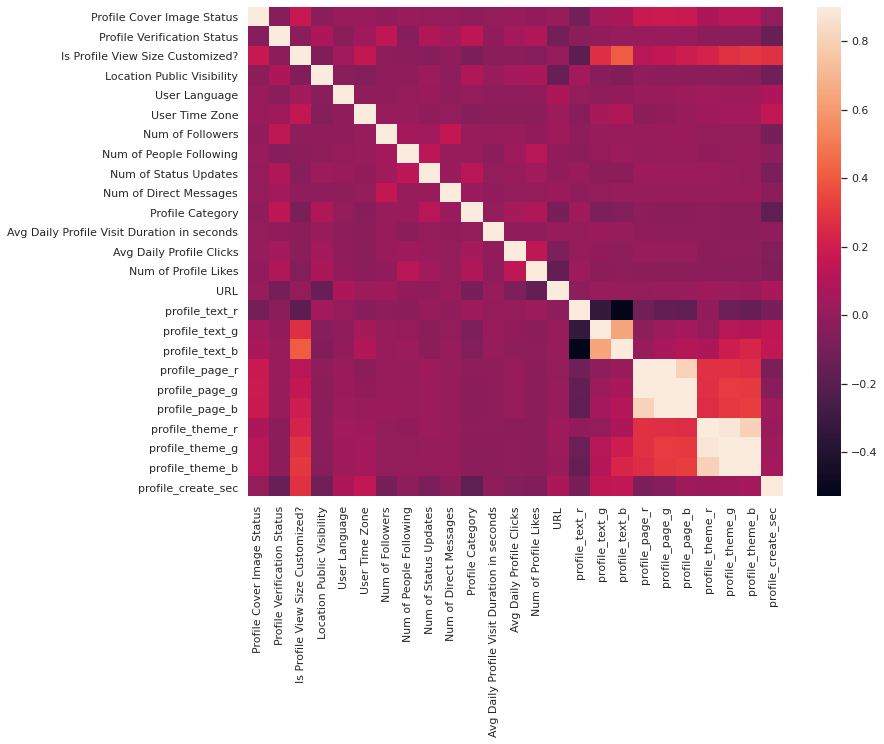

In [290]:
corrmat = train_df_p.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9)
plt.show()

In [291]:
pd.DataFrame(corrmat['Num of Profile Likes']).sort_values(by=['Num of Profile Likes'])

,Num of Profile Likes
URL,-0.165150
profile_create_sec,-0.060728
Is Profile View Size Customized?,-0.049112
profile_theme_g,-0.033078
User Time Zone,-0.029241
profile_theme_b,-0.028640
profile_page_r,-0.026620
profile_page_b,-0.025728
profile_theme_r,-0.025128
profile_page_g,-0.025106


In [397]:
'''
cols_x = ['URL',
          'Profile Cover Image Status',
          'Profile Verification Status',
          'Is Profile View Size Customized?',
          'Location Public Visibility', 
          'User Language', 
          'profile_create_sec', 
          'Num of Followers', 
          'Num of People Following', 
          'Num of Status Updates', 
          'Num of Direct Messages',
          'Profile Category',
          'Avg Daily Profile Visit Duration in seconds', 
          'Avg Daily Profile Clicks', 
          'profile_text_r', 
          'profile_text_g', 
          'profile_text_b', 
          'profile_page_r', 
          'profile_page_g', 
          'profile_page_b', 
          'profile_theme_r', 
          'profile_theme_g', 
          'profile_theme_b' 
          ]'''
cols_x = ['URL',
          #'Profile Cover Image Status',
          'Profile Verification Status',
          #'Is Profile View Size Customized?',
          'Location Public Visibility', 
          'User Language', 
          'profile_create_sec', 
          #'User Time Zone',
          #'Num of Followers', 
          'Num of People Following', 
          'Num of Status Updates', 
          'Num of Direct Messages',
          'Profile Category',
          'Avg Daily Profile Visit Duration in seconds', 
          'Avg Daily Profile Clicks', 
          #'profile_text_r', 
          #'profile_text_g', 
          #'profile_text_b', 
          #'profile_page_r', 
          #'profile_page_g', 
          #'profile_page_b', 
          #'profile_theme_r', 
          #'profile_theme_g', 
          #'profile_theme_b' 
          ]
cols_y = 'Num of Profile Likes'

In [293]:
# frequency encoding
# Color: Frequency Encoding (~1900 colors, they have different encodings)
# User Time Zone: frequency encoding (duplicate feature with UTC-offset)
# User Language: frequency encoding (28 unique)
def trans_freq(x_freq,x_freq_col):
  for name in x_freq.columns:
    if name in x_freq_col:
      fe = x_freq.groupby(name).size()/len(x_freq)
      x_freq.loc[:, name] = x_freq[name].map(fe)
    
  return x_freq 

In [294]:
x = train_df_p[cols_x]
y = train_df_p[cols_y]

3.137463595788179
0.6397188173470356
13.189573200499751


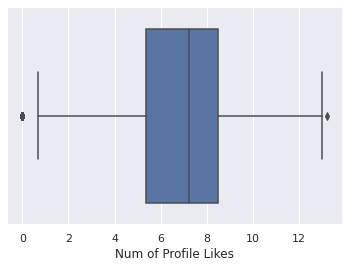

In [295]:
sns.boxplot(x= np.log(y+1))
Q1 = np.log(y+1).quantile(0.25)
Q3 = np.log(y+1).quantile(0.75)
IQR = Q3-Q1
IQR = Q3-Q1
print(IQR)

lowerlimit = Q1- 1.5*IQR
higherlimit = Q3+ 1.5*IQR
print(lowerlimit)
print(higherlimit)



In [296]:
outliers = train_df_p[(np.log(y+1)<= lowerlimit) | (np.log(y+1)>= higherlimit)]

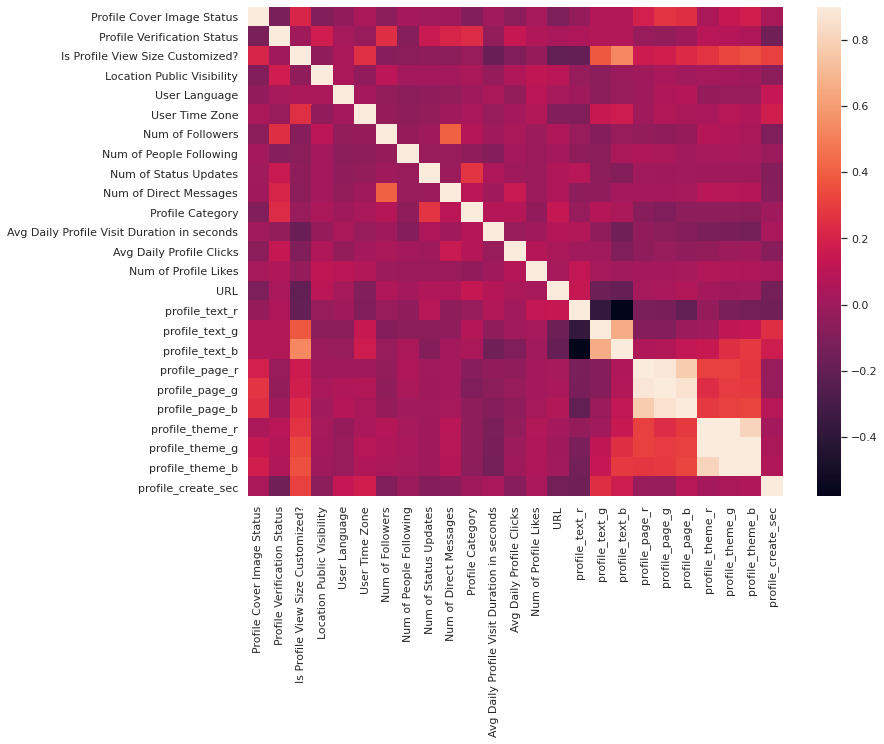

In [297]:
corrmat = outliers.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9)
plt.show()

In [298]:
pd.DataFrame(corrmat['Num of Profile Likes']).sort_values(by=['Num of Profile Likes'])

,Num of Profile Likes
Profile Category,-0.037632
Is Profile View Size Customized?,-0.028030
Num of Direct Messages,-0.012773
Num of Status Updates,-0.010816
Num of People Following,-0.008480
Num of Followers,-0.005405
Avg Daily Profile Visit Duration in seconds,0.002904
profile_text_b,0.013833
profile_page_r,0.020321
profile_page_g,0.022029


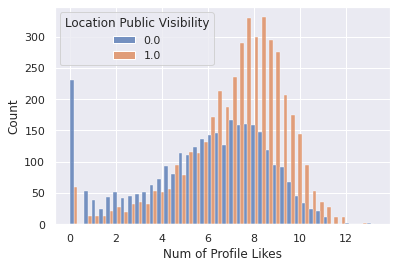

In [300]:
dataplot = train_df_p.copy()
dataplot[cols_y] = np.log1p(dataplot[cols_y])

sns.histplot(x=cols_y,data= dataplot, hue='Location Public Visibility' , multiple="dodge")

In [301]:
train_df_p[cols_y]

0       2815.0
1       1242.0
2       1559.0
3       6342.0
4       1078.0
         ...  
7495    1373.0
7496    1407.0
7497    1235.0
7498    1105.0
7499     375.0
Name: Num of Profile Likes, Length: 7500, dtype: float64

In [399]:
x = train_df_p[cols_x]
y = train_df_p[cols_y]

# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=76) #  To guarantee that the split will always be the same 

#one hot encoding + log transformation
X_train_dum = pd.get_dummies(X_train)
X_test_dum = pd.get_dummies(X_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

freq_col = [
            #'profile_text_r', 
            #'profile_text_g', 
            #'profile_text_b', 
            #'profile_page_r', 
            #'profile_page_g', 
            #'profile_page_b', 
            #'profile_theme_r', 
            #'profile_theme_g', 
            #'profile_theme_b', 
            #'profile_create_sec',
            #'Num of Followers',                          
            #'Num of People Following'   ,                      
            #'Num of Status Updates'   ,                         
            #'Num of Direct Messages'  ,                                
            ##'Avg Daily Profile Visit Duration in seconds',     
            #'Avg Daily Profile Clicks',
            'profile_create_sec'
            ]

# frequency encoding
X_train_freq= trans_freq(X_train.copy(), freq_col)
X_test_freq= trans_freq(X_test.copy(), freq_col)

#再整理出一组标准化的数据，通过对比可以看出模型的效果有没有提高
from sklearn.preprocessing import MaxAbsScaler
scale_x=QuantileTransformer(n_quantiles=10, random_state=67)
#x1=scale_x.fit_transform(x)
#scale_y=StandardScaler()
#y=np.array(y).reshape(-1,1)
#y1=scale_y.fit_transform(y)
#y1=y1.ravel()
X_train1= scale_x.fit_transform(X_train)
X_test1 = scale_x.fit_transform(X_test)
#y_train1 = scale_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
#y_test1 = scale_y.fit_transform(np.array(y_test).reshape(-1,1)).ravel()

PCA not better #poly 7.11, PCA 6.39

In [392]:
result = pd.DataFrame(columns = ("Regression","Training","Testing"))
regression, train_scores, test_scores = [],[],[]

In [364]:
estimator = XGBRegressor(booster= 'gbtree',
                              learning_rate= 0.1, max_depth=3, min_child_weight= 3, 
                              n_estimators= 150) 
#PolynomialFeatures(2),
model = make_pipeline( estimator)
model.fit(X_train_dum, y_train_log)
ypred = model.predict(X_test_dum)
ypred_original=np.exp(ypred) -1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error(y_test,ypred_original))

[20:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.8535102920948163


In [365]:

model.fit(X_train1,y_train_log)
ypred = model.predict(X_test1)
ypred_original=np.exp(ypred)-1
ypred_original = np.around(np.maximum(ypred_original, 0))

print(mean_squared_log_error( y_test, ypred_original))


[20:15:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.8791921318915494


In [402]:
  models=[LinearRegression(),
          KNeighborsRegressor(),
          SVR(),
          Ridge(),
          Lasso(),
          MLPRegressor(hidden_layer_sizes=(6, 4, 2,2),  activation='relu', solver='lbfgs', alpha=200, batch_size='auto',learning_rate='adaptive', learning_rate_init=0.0001, power_t=0.8, max_iter=5000, shuffle=True,random_state=67, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,early_stopping=True,beta_1=0.9, beta_2=0.9, epsilon=1e-08),
          DecisionTreeRegressor(),
          ExtraTreeRegressor(),
          RandomForestRegressor(n_estimators=100,random_state=67),
          AdaBoostRegressor(),
          GradientBoostingRegressor(),
          BaggingRegressor(n_estimators=100) ,
          XGBRegressor(booster= 'gbtree',
                              learning_rate= 0.1, max_depth=3, min_child_weight= 3, 
                              n_estimators= 150) 
          ]
  models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree',
              'RandomForest','AdaBoost','GradientBoost','Bagging','XGBRegressor', 'TheilSenRegressor','RANSACRegressor','HuberRegressor']
  score_adapt=[]
  for name,estimator in zip(models_str,models):

    try:
          print('---------------------------------')
          #if name in ['LinearRegression','Ridge','ExtraTree']:   
          print('开始训练模型：'+name+' 平滑处理')
          model = make_pipeline(PolynomialFeatures(3), estimator)
          model.fit(X_train_dum,y_train_log)
          y_pred_log=model.predict(X_test_dum)   
          ypred_original=np.exp(y_pred_log) -1
          ypred_original = np.around(np.maximum(ypred_original, 0))

          print(name +' rmsle:',np.sqrt(mean_squared_log_error(y_test, ypred_original)))
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    
    try:
          print('---------------------------------')  
          #elif name in ['SVR','MLPRegressor','Bagging','AdaBoost','KNNRegressor']:
          print('开始训练模型：'+name+' 标准化处理')
          model = make_pipeline(PolynomialFeatures(3), estimator)    
          model.fit(X_train1,y_train_log)
          y_pred1=model.predict(X_test1)
          ypred_original=np.exp(y_pred1) -1
          #ypred_original=scale_y.inverse_transform(y_pred1.reshape(-1, 1)).ravel()
          ypred_original = np.around(np.maximum(ypred_original, 0))
    
          
          print(name +' rmsle:',np.sqrt((mean_squared_log_error(y_test, ypred_original))))

    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    '''
    try:  
          print('---------------------------------')      
          print('开始训练模型：'+name+' 频率')
         
          model.fit(X_train_freq,y_train_log)
          y_pred_log=model.predict(X_test_freq)
          ypred_original=np.exp(y_pred_log) 
          ypred_original = np.around(np.maximum(ypred_original, 0))
          score_adapt.append(str(score)[:5])    
          print(name +' msle:'+str(mean_squared_log_error(y_test, ypred_original)))

         
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    try:    
          print('---------------------------------') 
          print('开始训练模型：'+name+' 普通')
         
          model.fit(X_train,y_train)
          y_pred = model.predict(X_test)
          y_pred = np.around(np.maximum(y_pred, 0))
          score=model.score(X_test,y_test)
          score_adapt.append(str(score)[:5])   
          print(name +' msle:'+str(mean_squared_log_error(y_test, y_pred)))

          print('---------------------------------')
    except:
          print(print("Unexpected error:", sys.exc_info()[0]))
    '''

---------------------------------
开始训练模型：LinearRegression 平滑处理
LinearRegression rmsle: 2.293030058566997
---------------------------------
开始训练模型：LinearRegression 标准化处理
LinearRegression rmsle: 1.742655679522089
---------------------------------
开始训练模型：KNNRegressor 平滑处理
KNNRegressor rmsle: 2.6839759229767517
---------------------------------
开始训练模型：KNNRegressor 标准化处理
KNNRegressor rmsle: 1.8974723374659392
---------------------------------
开始训练模型：SVR 平滑处理
SVR rmsle: 2.5340326791075
---------------------------------
开始训练模型：SVR 标准化处理
SVR rmsle: 1.7881992718970332
---------------------------------
开始训练模型：Ridge 平滑处理
Unexpected error: <class 'ValueError'>
None
---------------------------------
开始训练模型：Ridge 标准化处理
Ridge rmsle: 1.7281576524189552
---------------------------------
开始训练模型：Lasso 平滑处理


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41987e-57): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12437.14824517435, tolerance: 4.446535211806862
  positive)


Lasso rmsle: 2.0549581480153027
---------------------------------
开始训练模型：Lasso 标准化处理
Lasso rmsle: 2.5312903654059027
---------------------------------
开始训练模型：MLPRegressor 平滑处理
MLPRegressor rmsle: 2.5312903654059027
---------------------------------
开始训练模型：MLPRegressor 标准化处理
MLPRegressor rmsle: 1.7395995769363934
---------------------------------
开始训练模型：DecisionTree 平滑处理
DecisionTree rmsle: 2.4302423944006715
---------------------------------
开始训练模型：DecisionTree 标准化处理
DecisionTree rmsle: 2.6024737302144474
---------------------------------
开始训练模型：ExtraTree 平滑处理
ExtraTree rmsle: 2.5794196175592
---------------------------------
开始训练模型：ExtraTree 标准化处理
ExtraTree rmsle: 2.5205910850732676
---------------------------------
开始训练模型：RandomForest 平滑处理
RandomForest rmsle: 1.6983750131028463
---------------------------------
开始训练模型：RandomForest 标准化处理
RandomForest rmsle: 1.7425812671826029
---------------------------------
开始训练模型：AdaBoost 平滑处理
AdaBoost rmsle: 2.0498084237450183
--------------------

In [330]:
import xgboost as xgb

In [369]:
x = train_df_p[cols_x]
y = train_df_p[cols_y]
train_df_visible = train_df_p[train_df_p['Location Public Visibility'] >0]
train_df_invisible = train_df_p[train_df_p['Location Public Visibility'] <=0]
x_visible = train_df_visible[cols_x]
x_visible.drop(columns=['Location Public Visibility'])
y_visible = train_df_visible[cols_y]
x_invisible = train_df_invisible[cols_x]
x_invisible.drop(columns=['Location Public Visibility'])
y_invisible = train_df_invisible[cols_y]

In [371]:
gdboost = GradientBoostingRegressor( loss = 'ls',n_estimators=150) #loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
#mlp = MLPRegressor(hidden_layer_sizes=(6, 4, 2,2),  activation='relu', solver='lbfgs', alpha=200, batch_size='auto',learning_rate='adaptive', learning_rate_init=0.0001, power_t=0.8, max_iter=5000, shuffle=True,random_state=67, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,early_stopping=True,beta_1=0.9, beta_2=0.9, epsilon=1e-08)
         
#model = xgb.XGBRegressor(booster= 'gbtree',learning_rate= 0.1, max_depth=3, min_child_weight= 3,  n_estimators= 150) 
model = make_pipeline(gdboost)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# Set the parameters by cross-validation
tuned_parameters = [{
  'loss': ['ls', 'lad', 'huber', 'quantile'],
  'max_features':['auto', 'sqrt', 'log2']}
]

metric = 'neg_root_mean_squared_error'

cv_strategy = KFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(
    gdboost, tuned_parameters, scoring=metric, cv=cv_strategy
)
grid_search.fit(X_train_dum, y_train_log);
print('Finished!')

Finished!


In [ ]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

Best parameters set found on development set:

{'loss': 'ls', 'max_features': 'auto'}


In [373]:
test_df_visible = test_df_p[test_df_p['Location Public Visibility'] >0]
test_df_invisible = test_df_p[test_df_p['Location Public Visibility'] <=0]
test_visible = test_df_visible[cols_x]
test_visible.drop(columns=['Location Public Visibility'])
test_invisible = test_df_invisible[cols_x]
test_visible.drop(columns=['Location Public Visibility'])

,URL,Profile Verification Status,User Language,profile_create_sec,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks
7500,0.0,0.0,4,1.248124e+09,2148,12926,469,1.0,13.827,3.4062
7501,0.0,0.0,4,1.249511e+09,262,11678,1806,3.0,24.019,3.2656
7502,1.0,2.0,4,1.300473e+09,392,9395,59247,0.0,26.011,12.1619
7504,1.0,0.0,4,1.338839e+09,1701,1022,8,0.0,17.878,3.9660
7507,0.0,2.0,4,1.229995e+09,1983,20568,2097,1.0,21.966,2.5306
...,...,...,...,...,...,...,...,...,...,...
9992,0.0,0.0,6,1.300337e+09,3289,5805,43,0.0,12.441,2.9135
9993,0.0,2.0,5,1.248220e+09,2295,8047,1061,0.0,38.455,7.3366
9994,0.0,2.0,4,1.293576e+09,992,32182,2563,1.0,26.346,3.3590
9996,0.0,0.0,4,1.216154e+09,5833,17282,912,3.0,13.185,1.8277


In [374]:
y_visible

0       2815.0
1       1242.0
2       1559.0
3       6342.0
4       1078.0
         ...  
7493    4836.0
7494     387.0
7496    1407.0
7497    1235.0
7498    1105.0
Name: Num of Profile Likes, Length: 4355, dtype: float64

In [375]:
x_dum = pd.get_dummies(x_visible)
y_log = np.log(y_visible+1)
model.fit(x_dum,y_log)
test_dum =  pd.get_dummies( test_visible)

predict_test = model.predict(test_dum)
ypred_original=np.exp(predict_test) -1
predict_visible = np.around(np.maximum(ypred_original, 0))

In [376]:
predict_visible

array([4839., 2744.,  189., ..., 5641., 4113., 3589.])

In [377]:

predict_visible_out = pd.DataFrame(test_df_visible['Id'])

# Make predictions
predict_visible_out['Predicted'] =  predict_visible

In [378]:
predict_visible_out

,Id,Predicted
7500,49I3SOKLI2CMNGP4,4839.0
7501,727IRIR59A3P88LK,2744.0
7502,LN95SD15SRPCEE8F,189.0
7504,32PSGCK5PATHMR07,100.0
7507,AI23CE9L10CFLK8N,9514.0
...,...,...
9992,H4QQHDFPE7QP0B76,3124.0
9993,BRFRG477P9S6MMQ2,5131.0
9994,0HRQG5NRLP0KDHNK,5641.0
9996,PRT8RDNG6E86518P,4113.0


In [379]:
x_dum = pd.get_dummies(x_invisible)
y_log = np.log(y_invisible+1)
model.fit(x_dum,y_log)
test_dum =  pd.get_dummies(test_invisible)

predict_test = model.predict(test_dum)
ypred_original=np.exp(predict_test) -1
predict_invisible = np.around(np.maximum(ypred_original, 0))

In [356]:
len(predict_invisible)

991

In [381]:

predict_invisible_out = pd.DataFrame(test_df_invisible['Id'])

# Make predictions
predict_invisible_out['Predicted'] =  predict_invisible

In [382]:
predict_invisible_out

,Id,Predicted
7503,TB11I7F0PN033D4T,6366.0
7505,KCGC12BK5PGHP4SO,1628.0
7506,SE7SP9PNCS9H4RKL,31.0
7508,MC4LR1DKGGEL4C4C,47.0
7513,EPF30Q5AAPONR3R9,327.0
...,...,...
9987,7SD7S81PCH8TT8O8,523.0
9989,C4GAI1ONF5N0THR5,3283.0
9995,7SDJE48EFRPPNEJK,238.0
9998,6CP232J9R8N84702,846.0


In [383]:
out = pd.concat((predict_visible_out, predict_invisible_out))

In [384]:
# Check output
out

,Id,Predicted
7500,49I3SOKLI2CMNGP4,4839.0
7501,727IRIR59A3P88LK,2744.0
7502,LN95SD15SRPCEE8F,189.0
7504,32PSGCK5PATHMR07,100.0
7507,AI23CE9L10CFLK8N,9514.0
...,...,...
9987,7SD7S81PCH8TT8O8,523.0
9989,C4GAI1ONF5N0THR5,3283.0
9995,7SDJE48EFRPPNEJK,238.0
9998,6CP232J9R8N84702,846.0


In [386]:
# Save output
out.to_csv('predictions.csv', index=False)

----------------------------------------------------------------------

# Feature Engineering Ideas
- Color: Convert 16-digit Hex Code to 0-255, Separate Columns RR-GG-BB, then will have numeric features
- Color: Frequency Encoding (~1900 colors, they have different encodings)
- User Time Zone: frequency encoding (duplicate feature with UTC-offset)
- User Language: frequency encoding (28 unique)
- Profile Creation Timestamp: convert to long numeric (the year matters)

# Comp550 Project Ideas
- https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data
- https://www.kaggle.com/c/quora-insincere-questions-classification/overview

In [157]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiLabelNN(nn.Module):
    def __init__(self):
      super(MultiLabelNN, self).__init__()
      self.conv1 = nn.Conv2d(3, 64, 5)
      self.pool = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(64, 16, 5)
      self.fc1 = nn.Linear(3200,1024)
      self.fc2 = nn.Linear(1024, 512)
      self.fc3 = nn.Linear(512, 1)

    def forward(self, x):
       #shape of x is (b_s, 32,32,1)
      x = self.conv1(x) #shape of x is (b_s, 28,28,132)
      x = F.leaky_relu(x)
      x = self.pool(x) #shape of x now becomes (b_s X 14 x 14 x 32)
      x = self.conv2(x) # shape(b_s, 10x10x64)
      x = F.leaky_relu(x)#size is (b_s x 10 x 10 x 64)
      x = x.view(-1, 3200) # shape of x is now(b_s*2, 3200)
      #print(x.size())
       #this is the problem 
       #you can fc1 to be of shape (6400,1024) and that will work 
      x = self.fc1(x)
      x = self.fc2(x)
      x = F.leaky_relu(x)
      x = self.fc3(x)
      #print(x)
      return x  

In [88]:
import ntpath
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

In [147]:
from torch.utils.data import Dataset, DataLoader
from multiprocessing import Pool
from torchvision.datasets.folder import pil_loader

class ImageFolderInMemory(Dataset):
    """
    This class loads the data provided and stores it entirely in memory as a dataset.

    It makes use of torchvision.datasets.ImageFolder() to create a dataset. Afterward all images are
    sequentially stored in memory for faster use when paired with dataloders. It is responsibility of
    the user ensuring that the dataset actually fits in memory.
    """

    def __init__(self, path, transform=None, target_transform=None, workers=1):
        """
        Load the data in memory and prepares it as a dataset.

        Parameters
        ----------
        path : string
            Path to the dataset on the file System
        transform : torchvision.transforms
            Transformation to apply on the data
        target_transform : torchvision.transforms
            Transformation to apply on the labels
        workers: int
            Number of workers to use for the dataloaders
        """
        self.dataset_folder = os.path.expanduser(path)
        self.transform = transform
        self.target_transform = target_transform

        # Get an online dataset
        dataset = torchvision.datasets.ImageFolder(path)

        # Shuffle the data once (otherwise you get clusters of samples of same class in each minibatch for val and test)
        np.random.shuffle(dataset.imgs)

        # Extract the actual file names and labels as entries
        file_names = np.asarray([item[0] for item in dataset.imgs])
        filename = [path_leaf(path) for path in file_names]
        self.labels = train_df[train_df['Profile Image'].isin(filename)][cols_y]

        # Load all samples
        pool = Pool(workers)
        self.data = pool.map(pil_loader, file_names)
        pool.close()

        # Set expected class attributes
        self.classes = np.unique(self.labels)

    def __getitem__(self, index):
        """
        Retrieve a sample by index

        Parameters
        ----------
        index : int

        Returns
        -------
        img : FloatTensor
        target : int
            label of the image
        """

        img, target = self.data[index], self.labels[index]

        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        return len(self.data)

In [43]:
!mv /content/test_profile_images/profile_images_test/*.png /content/test_profile_images/profile_images_test/test

In [158]:
import torch.optim as optim
from torchvision import transforms
import torchvision

transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

training = ImageFolderInMemory('/content/train_profile_images/profile_images_train',
                                         transform=transform)
testing = ImageFolderInMemory('/content/test_profile_images/profile_images_test/',
                                         transform=transform)
train_loader = torch.utils.data.DataLoader(training, batch_size=4,
                                         shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(testing, batch_size=4,
                                        shuffle=False, num_workers=2)

print(training)

model = MultiLabelNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, likes = data
        likes = likes.float()
   
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
    
        loss = criterion(outputs, likes)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1,   100] loss: 5893713.720
[1,   200] loss: 5437974.905
[1,   300] loss: 30053444.050
[1,   400] loss: 11263039.914
[1,   500] loss: 32127513.611
[1,   600] loss: 6576762.305
[1,   700] loss: 7004439.905
[1,   800] loss: 6545000.768
[1,   900] loss: 18022973.550
[1,  1000] loss: 7463875.158
[1,  1100] loss: 42061448.579
[1,  1200] loss: 28630408.648
[1,  1300] loss: 7725023.956
[1,  1400] loss: 18987811.738
[1,  1500] loss: 7180979.905
[1,  1600] loss: 8001247.542
[1,  1700] loss: 3227919.935
[1,  1800] loss: 5737755.821
[2,   100] loss: 7263098.567
[2,   200] loss: 9757359.729
[2,   300] loss: 19308365.301
[2,   400] loss: 3514245.103
[2,   500] loss: 8559363.199
[2,   600] loss: 5218995.674
[2,   700] loss: 9510697.292
[2,   800] loss: 33959231.391
[2,   900] loss: 4321524.464
[2,  1000] loss: 6140874.672
[2,  1100] loss: 55121236.009
[2,  1200] loss: 6464680.543
[2,  1300] loss: 7726414.353
[2,  1400] loss: 20057806.967
[2,  1500] loss: 6398495.319
[2,  1600] loss: 2324065.384
[2,

KeyboardInterrupt: ignored

In [149]:
running_loss

515066890868.875